In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/car-price-details/car data.csv
/kaggle/input/car-price-details/CAR DETAILS FROM CAR DEKHO.csv
/kaggle/input/car-price-details/Car details v3.csv


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import plotly.graph_objs as go
import plotly.express as px

In [3]:
df = pd.read_csv("../input/car-price-details/CAR DETAILS FROM CAR DEKHO.csv")
df.head(-1)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner
...,...,...,...,...,...,...,...,...
4334,Toyota Innova 2.5 VX (Diesel) 8 Seater BS IV,2012,600000,170000,Diesel,Individual,Manual,First Owner
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,Diesel,Individual,Manual,Second Owner
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,Diesel,Individual,Manual,Second Owner
4337,Maruti 800 AC BSIII,2009,110000,83000,Petrol,Individual,Manual,Second Owner


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [5]:
df.shape

(4340, 8)

In [6]:
df.describe()

,year,selling_price,km_driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


In [7]:
df.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

In [8]:
df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner'],
      dtype='object')

In [9]:
df["make"] = df.name.apply(lambda x : ''.join(x.split(' ')[0]))
df["make"]

0        Maruti
1        Maruti
2       Hyundai
3        Datsun
4         Honda
         ...   
4335    Hyundai
4336    Hyundai
4337     Maruti
4338    Hyundai
4339    Renault
Name: make, Length: 4340, dtype: object

In [10]:
df["name_2"] = df.name.apply(lambda x : ''.join(x.split(' ')[0]))

In [11]:
df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'make', 'name_2'],
      dtype='object')

In [12]:
df = df.drop(['name_2'], axis = 1)
df.reset_index(drop=True)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,make
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner,Maruti
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner,Maruti
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner,Hyundai
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner,Datsun
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner,Honda
...,...,...,...,...,...,...,...,...,...
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,Diesel,Individual,Manual,Second Owner,Hyundai
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,Diesel,Individual,Manual,Second Owner,Hyundai
4337,Maruti 800 AC BSIII,2009,110000,83000,Petrol,Individual,Manual,Second Owner,Maruti
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,Diesel,Individual,Manual,First Owner,Hyundai


In [13]:
df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'make'],
      dtype='object')

In [14]:
df.make.value_counts()

Maruti           1280
Hyundai           821
Mahindra          365
Tata              361
Honda             252
Ford              238
Toyota            206
Chevrolet         188
Renault           146
Volkswagen        107
Skoda              68
Nissan             64
Audi               60
BMW                39
Fiat               37
Datsun             37
Mercedes-Benz      35
Jaguar              6
Mitsubishi          6
Land                5
Volvo               4
Ambassador          4
Jeep                3
MG                  2
OpelCorsa           2
Daewoo              1
Force               1
Isuzu               1
Kia                 1
Name: make, dtype: int64

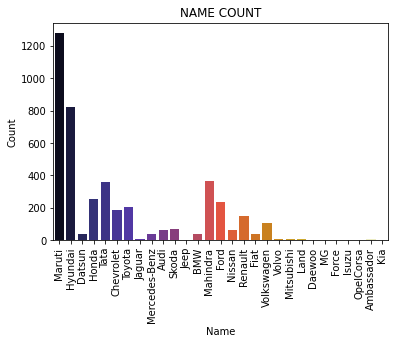

In [15]:
sns.countplot(data=df,x="make",palette="CMRmap")
plt.xticks(rotation=90)
plt.xlabel("Name",fontsize=10,color="black")
plt.ylabel("Count",fontsize=10,color="black")
plt.title("NAME COUNT",color="black")
plt.show()

In [16]:
labels = df["make"][:30].value_counts().index
labels

Index(['Maruti', 'Hyundai', 'Tata', 'Chevrolet', 'Datsun', 'Honda', 'Toyota',
       'Jaguar'],
      dtype='object')

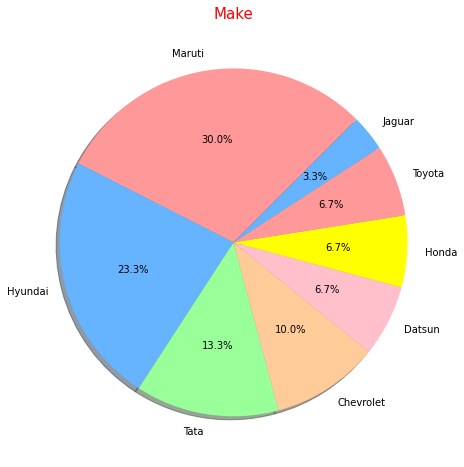

In [17]:
labels = df["make"][:30].value_counts().index
sizes = df["make"][:30].value_counts()
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99',"pink","yellow"]
plt.figure(figsize = (8,8))
plt.pie(sizes, labels=labels, rotatelabels=False, autopct='%1.1f%%',colors=colors,shadow=True, startangle=45)
plt.title('Make',color = 'red',fontsize = 15)
plt.show()

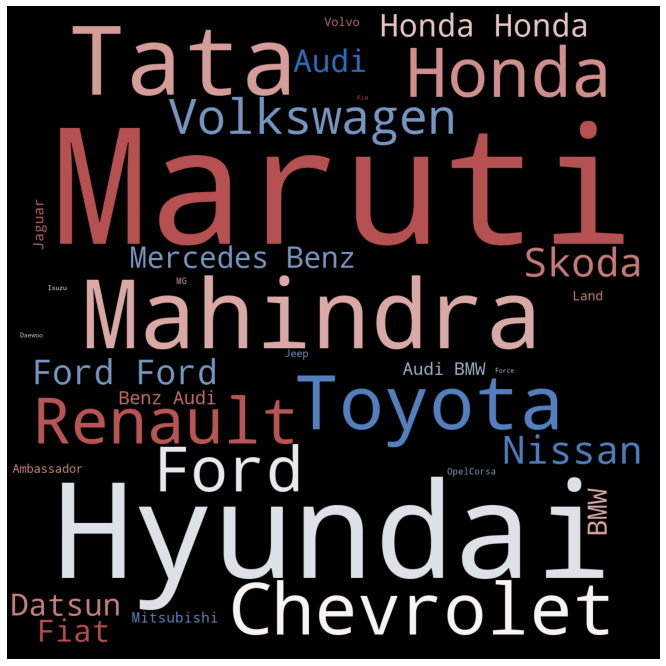

In [18]:
from wordcloud import WordCloud, STOPWORDS

text = ' '.join(df['make'])

plt.rcParams['figure.figsize'] = (12,12)
wordcloud = WordCloud(background_color = 'black',colormap='vlag', width = 1200,  height = 1200, max_words = 121).generate(text)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
plt.show()

In [19]:
df.year.value_counts()

2017    466
2015    421
2012    415
2013    386
2014    367
2018    366
2016    357
2011    271
2010    234
2019    195
2009    193
2008    145
2007    134
2006    110
2005     85
2020     48
2004     42
2003     23
2002     21
2001     20
1998     12
2000     12
1999     10
1997      3
1996      2
1995      1
1992      1
Name: year, dtype: int64

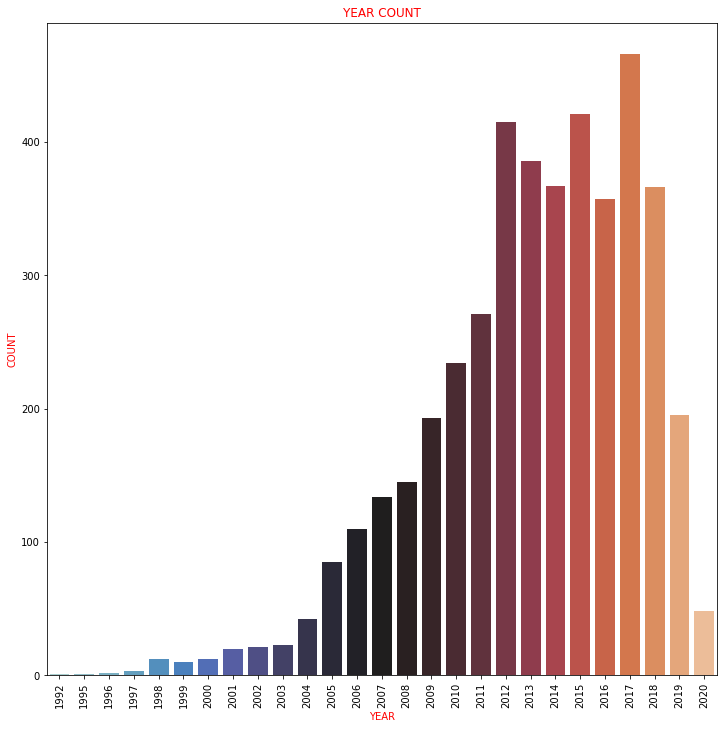

In [20]:
sns.countplot(data=df,x="year",palette="icefire")
plt.xticks(rotation=90)
plt.xlabel("YEAR",fontsize=10,color="RED")
plt.ylabel("COUNT",fontsize=10,color="RED")
plt.title("YEAR COUNT",color="RED")
plt.show()

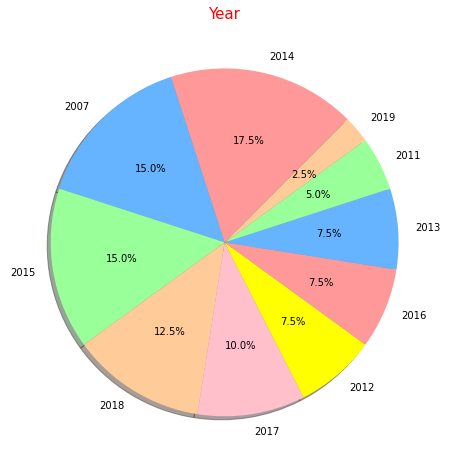

In [21]:
labels = df["year"][:40].value_counts().index
sizes = df["year"][:40].value_counts()
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99',"pink","yellow"]
plt.figure(figsize = (8,8))
plt.pie(sizes, labels=labels, rotatelabels=False, autopct='%1.1f%%',colors=colors,shadow=True, startangle=45)
plt.title('Year',color = 'red',fontsize = 15)
plt.show()

In [22]:
df.fuel.value_counts()

Diesel      2153
Petrol      2123
CNG           40
LPG           23
Electric       1
Name: fuel, dtype: int64

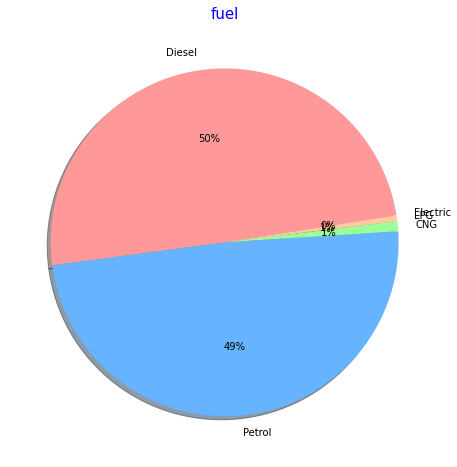

In [23]:
labels = df["fuel"].value_counts().index
sizes = df["fuel"].value_counts()
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99',"pink","yellow"]
plt.figure(figsize = (8,8))
plt.pie(sizes, labels=labels, rotatelabels=False, autopct='%1.f%%',colors=colors,shadow=True, startangle=9)
plt.title('fuel',color = 'blue',fontsize = 15)
plt.show()

In [24]:
df.seller_type.value_counts()

Individual          3244
Dealer               994
Trustmark Dealer     102
Name: seller_type, dtype: int64

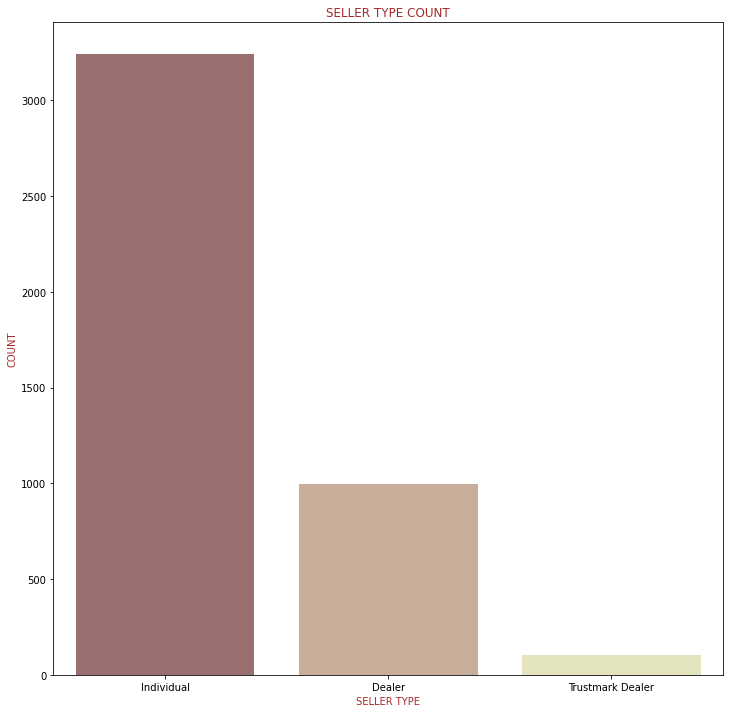

In [25]:
sns.countplot(data=df,x="seller_type",palette="pink")
plt.xlabel("SELLER TYPE",fontsize=10,color="brown")
plt.ylabel("COUNT",fontsize=10,color="brown")
plt.title("SELLER TYPE COUNT",color="brown")
plt.show()

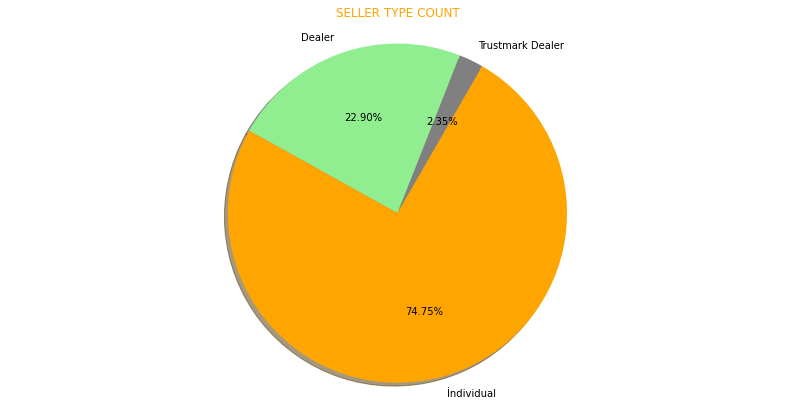

In [26]:
plt.figure(figsize=(14, 7))
labels=["Trustmark Dealer","Dealer","İndividual"]
plt.pie(df['seller_type'].value_counts().sort_values(),labels=labels,explode=[0,0,0],
        autopct='%1.2f%%',colors=['gray','lightgreen',"orange"], startangle=60,shadow=True)
plt.title("SELLER TYPE COUNT",color="orange")
plt.axis('equal')
plt.show()

In [27]:
df.transmission.value_counts()

Manual       3892
Automatic     448
Name: transmission, dtype: int64

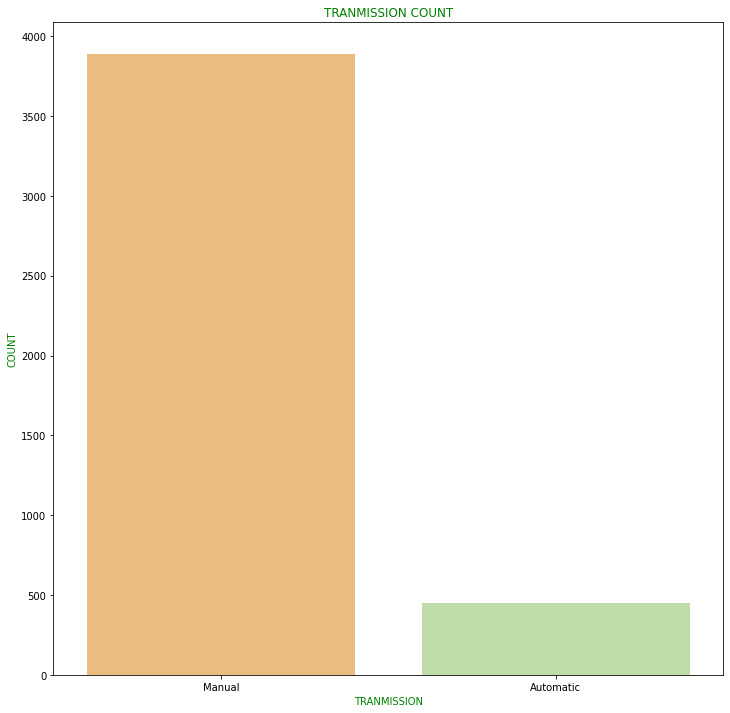

In [28]:
sns.countplot(data=df,x="transmission",palette="Spectral")
plt.xlabel("TRANMISSION",fontsize=10,color="GREEN")
plt.ylabel("COUNT",fontsize=10,color="GREEN")
plt.title("TRANMISSION COUNT",color="GREEN")
plt.show()

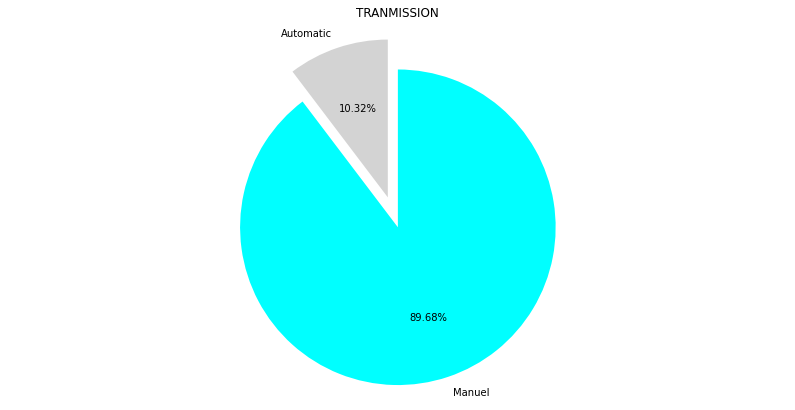

In [29]:
plt.figure(figsize=(14, 7))
labels=['Automatic', 'Manuel']
plt.pie(df['transmission'].value_counts().sort_values(),labels=labels,explode=[0.1,0.1],
        autopct='%1.2f%%',colors=['lightgray','cyan'], startangle=90)
plt.title('TRANMISSION')
plt.axis('equal')
plt.show()

In [30]:
df.owner.value_counts()

First Owner             2832
Second Owner            1106
Third Owner              304
Fourth & Above Owner      81
Test Drive Car            17
Name: owner, dtype: int64

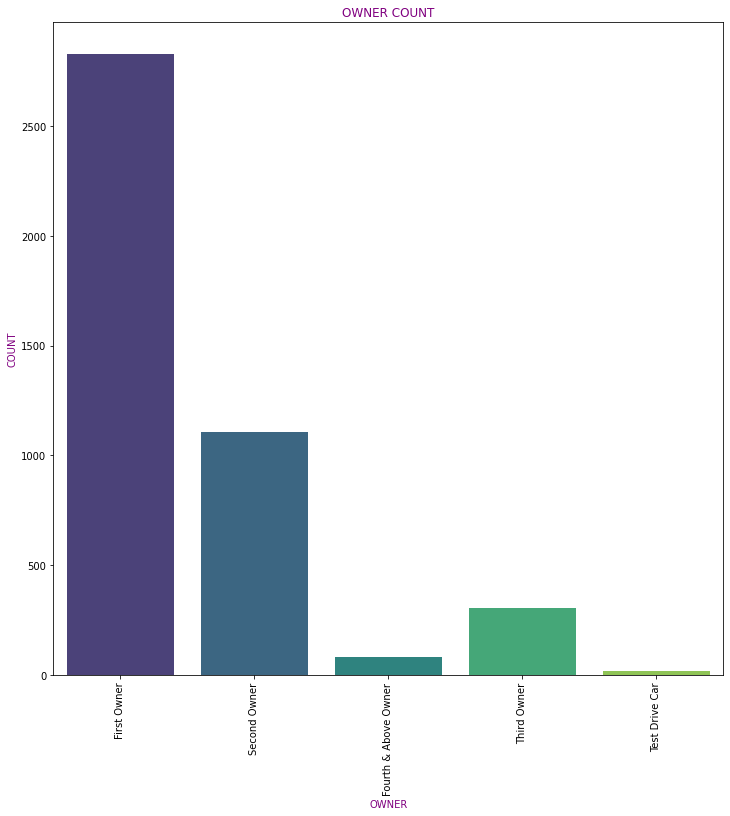

In [31]:
sns.countplot(data=df,x="owner",palette="viridis")
plt.xticks(rotation=90)
plt.xlabel("OWNER",fontsize=10,color="purple")
plt.ylabel("COUNT",fontsize=10,color="purple")
plt.title("OWNER COUNT",color="purple")
plt.show()

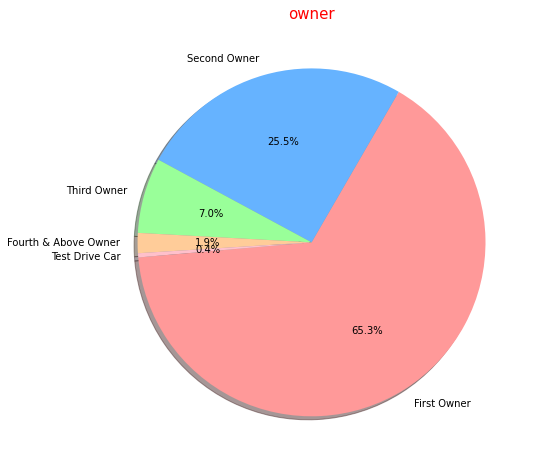

In [32]:
labels = df["owner"].value_counts().index
sizes = df["owner"].value_counts()
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99',"pink","yellow"]
plt.figure(figsize = (8,8))
plt.pie(sizes, labels=labels, rotatelabels=False, autopct='%1.1f%%',colors=colors,shadow=True, startangle=905)
plt.title('owner',color = 'red',fontsize = 15)
plt.show()

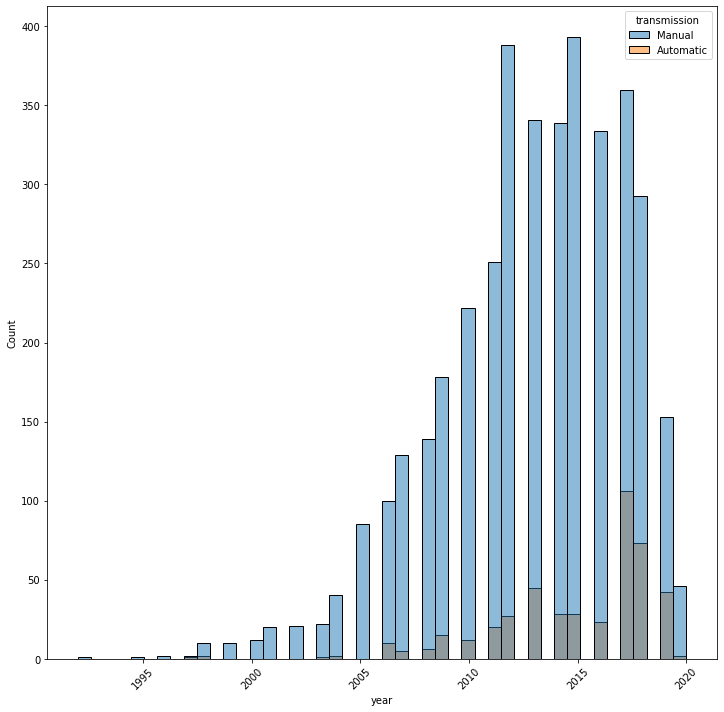

In [33]:
sns.histplot(data=df, x="year", hue="transmission")
plt.xticks(rotation=45)
plt.show()

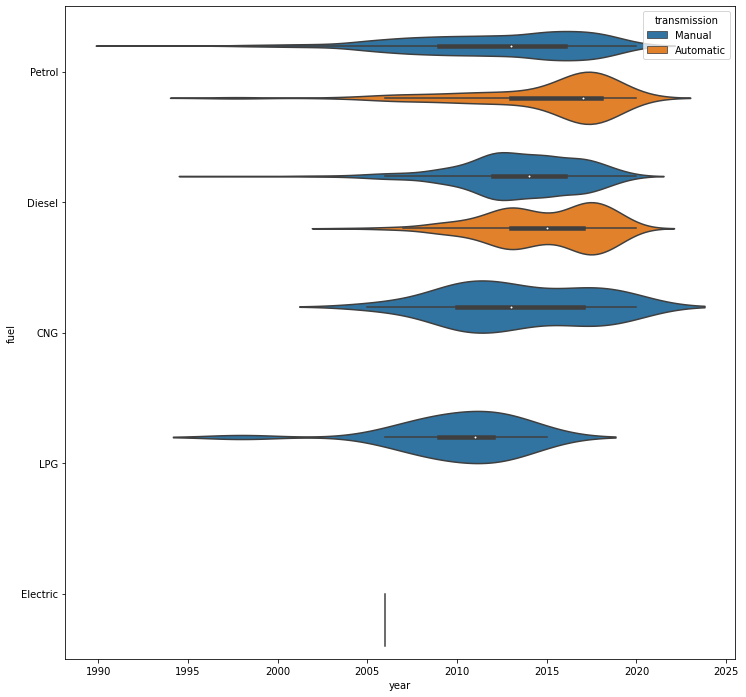

In [34]:
sns.violinplot(data=df, x="year", y="fuel",hue="transmission")
plt.show()

In [35]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,make
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner,Maruti
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner,Maruti
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner,Hyundai
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner,Datsun
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner,Honda


In [36]:
df1 = df.groupby(["transmission","fuel","make"],as_index=False)[['selling_price']].median().rename(columns={'selling_price':'price'})
fig = px.treemap(df1, path = [px.Constant("all"), "transmission","fuel","make"], 
                 values   ='price', color='make',
                 color_discrete_map={'(?)':'lightgrey', 'Lunch':'gold', 'Dinner':'darkblue'})
fig.update_layout(margin  = dict(t=50, l=25, r=25, b=25))
fig.show()

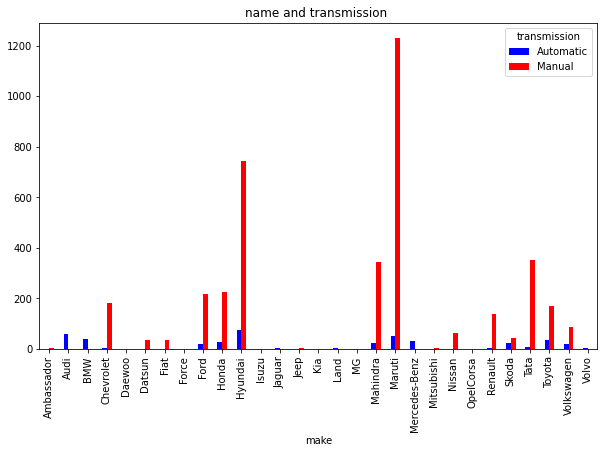

In [37]:
pd.crosstab(df["make"], df["transmission"]).plot(kind="bar", figsize=(10, 6), color=["blue","red"], title="name and transmission ")
plt.show()

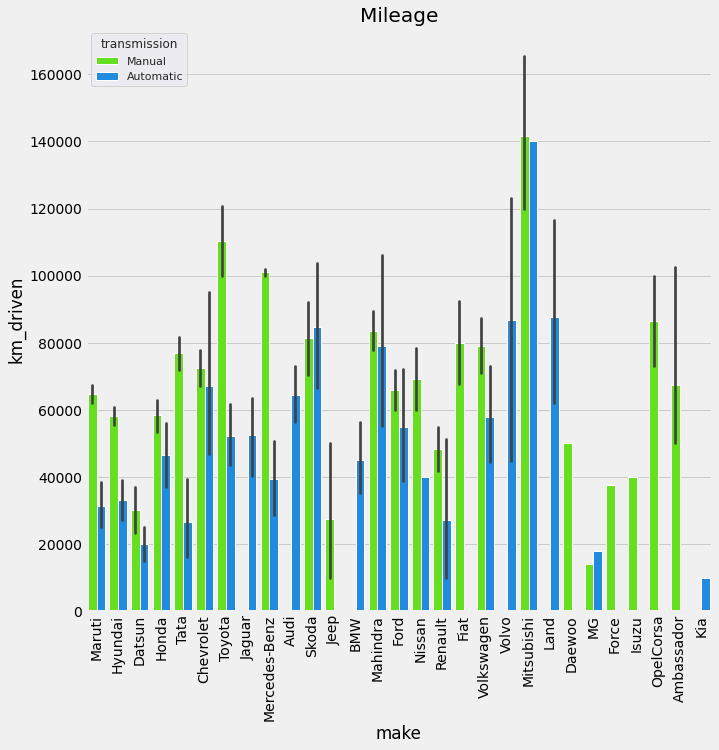

In [38]:
plt.style.use("fivethirtyeight")
plt.figure(figsize=(10,10))
plt.title("Mileage")
sns.set(font_scale=1)
plt.xticks(rotation=90)
sns.barplot(data=df, x="make", y="km_driven",hue="transmission",palette="gist_rainbow")
plt.show()

<AxesSubplot:>

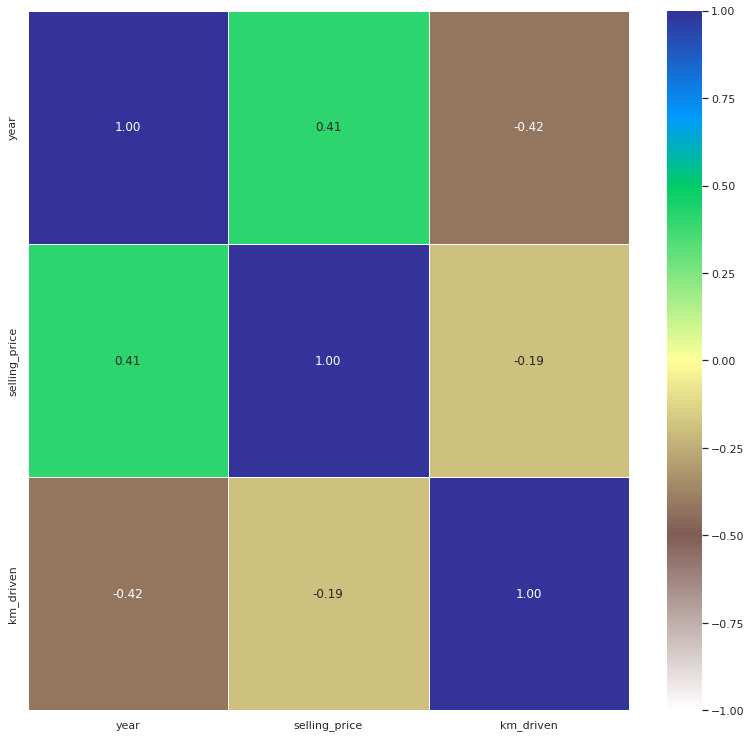

In [39]:
fig, ax = plt.subplots(figsize=(12,12))
corr1   = df.corr()
sns.heatmap(corr1, ax=ax, annot=True, cmap='terrain_r', fmt=".2f", linewidths=.5, vmin=-1, vmax=1)

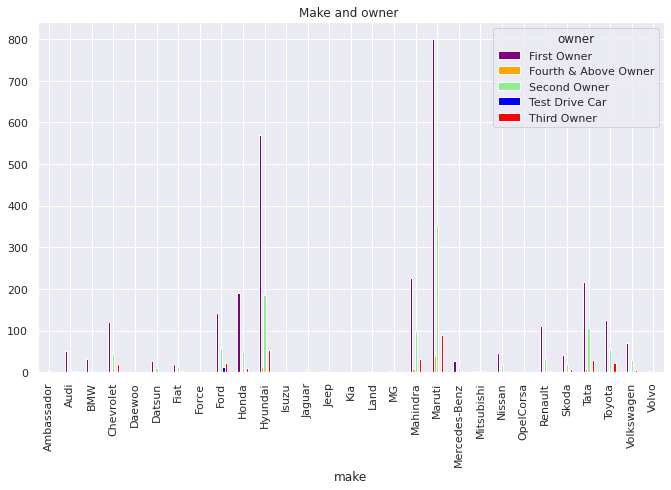

In [40]:
pd.crosstab(df["make"], df["owner"]).plot(kind="bar", figsize=(10, 6), color=["purple","orange","lightgreen","blue","red"], title="Make and owner ")
plt.show()

In [41]:
joint_data=df.sort_values(by='year', ascending=False)

top_rated=joint_data[:2500]
fig =px.sunburst(
    top_rated,
    path=['year',"make"],
    values='year',
    color='year')
fig.show()

In [42]:
joint_data=df.sort_values(by='year', ascending=False)

top_rated=joint_data[2500:]
fig =px.sunburst(
    top_rated,
    path=['year',"make"],
    values='year',
    color='year')
fig.show()

In [43]:
fig = px.strip(df, x='year', y='make', color='year')
fig.show()

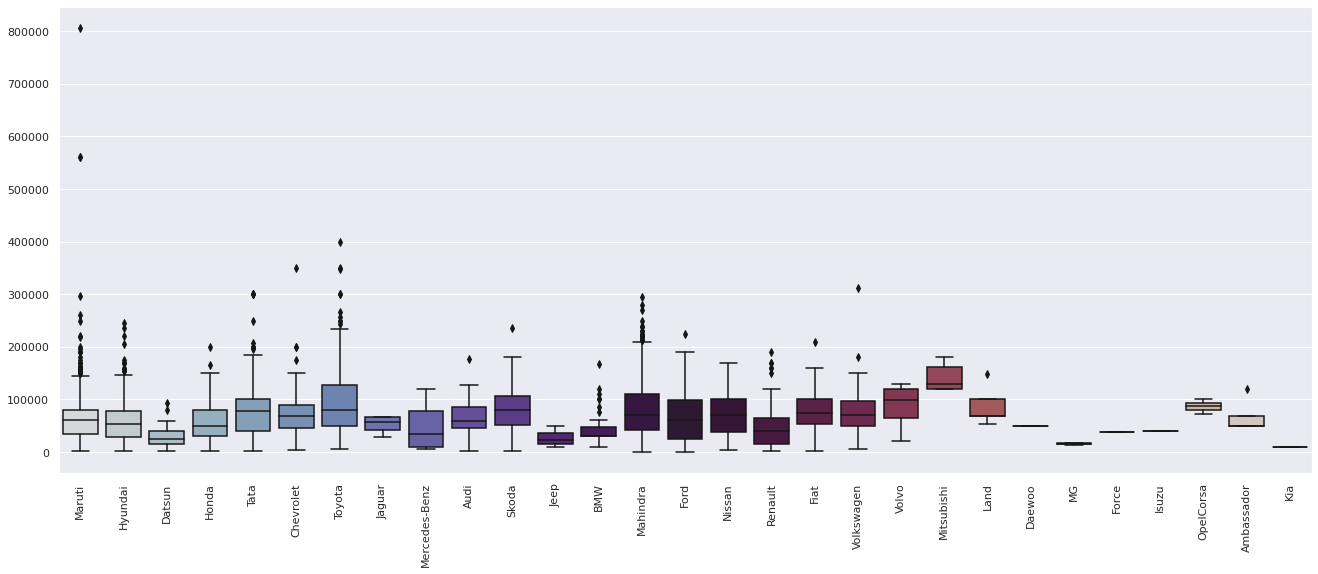

In [44]:
f, ax = plt.subplots(figsize=(20,8))
sns.boxplot(x=df["make"].values, y = df["km_driven"].values,palette="twilight",ax=ax)
plt.xticks(rotation=90)
plt.show()